# <!-- TITLE --> __```Exploration des données + Data Viz```__
<img width="1000px" height="400px" src="images/out.png"></img>

#### __```Importations des modules Python```__

In [1]:
%matplotlib inline 

In [2]:
import pandas as pd  
import numpy  as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.preprocessing import LabelEncoder


#### __```Importations des modules Python externes```__

In [3]:
from modules_python.file_extraction.extraction import read_plant_datasets
from modules_python.config.cmap import color_map as cmap
from modules_python.config.plot_images import plot as plot_img
from modules_python.image_processing.SemanticImage import SemanticImage

#### __```Liste des Couleurs disponibles```__

In [4]:
# liste de couleurs
python_colors = list(mcolors.CSS4_COLORS.keys())

#### __```Liste des Couleurs de mappage```__

In [5]:
# Mappage des couleurs
python_colors_map = cmap().get_cmap_list()

#### __```Définir le chemin d'accès du dataset```__

In [6]:
# Mettre son chemin ici, différent pour tout le monde (Iréné)
PATH = "C:\\Users\\amib\Documents\\Py_Projects\\DS_project\\especes"

#### __```Extraction des données```__

[Plus de détails sur les différents paramètres ici](https://github.com/amiehe-essomba/Plant_Seedlings_ds_Project/blob/Plant_Seedlings/details.md)

In [ ]:
# nombres d'espèces de plantes
samples         = 12

# pas
pas             = 1

# extraction de tout le dataset (samples = 12 et pas = 1)
type_indexes    = [x for x in range(0, samples, pas) ]

# type de filtre utilisé
channel_type    = "RGR2-LAB"

# fenetres de redimensionnement 
reshape         = [(160, 160)]

# format de données
return_as       = "dict"

# verbose
verbose         = 1

# régularisation l'intensité lumineuse dans l'infra-red
add_contrast    = True 

# début de l'extraction des fichiers
DATA            = read_plant_datasets(
                        path=PATH, 
                        reshape=reshape, 
                        return_as=return_as, 
                        verbose=verbose, 
                        type_indexes=type_indexes, 
                        channel_type=channel_type,
                        add_contrast=add_contrast
                        )

In [8]:
# selection du type de dimension
shape           = reshape[0]
# extraction & chargement 
data            = DATA[f"{shape[0]}x{shape[1]}"].copy()

In [9]:
# definir la légende(noms des plantes)
legend          = data['feature_names']
# définir les coleurs
colors          = ["blue", 'orange', 'darkgreen', 'darkred', 'm', "c", "lime", "k", "y", "violet", "gold", "darkblue" ]

#### __```Visualisation des différentes espèces de plantes en RBG et Infra-Red```__

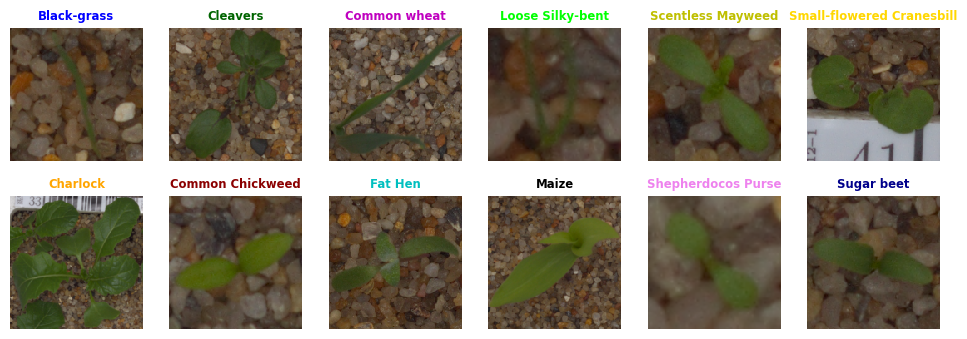

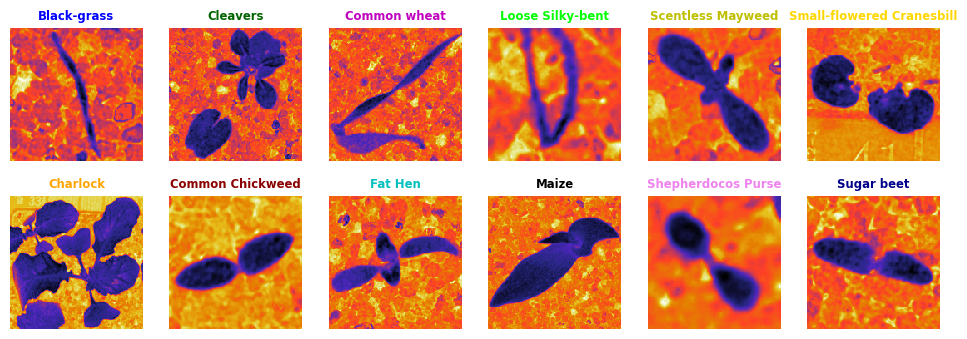

In [10]:
"""
Section de visualisation sur le canal 1.
à Savoir que, pour une bonne représentation des coleurs toutes les images ont 3 canaux (RGB2-LAB)
"""

for s in ['images', 'X']:
    # choisir l'unique valeur pour toutes les plantes 
    index           = 10
    # choisir le canal de couleur
    channel         = 1
    # types d'images X : RGR2-LAB, images : images réelles
    type_img        = s
    # index color map
    id_cmap         = 10
    # visualisation des images dans l'infra-red
    plot_img(
        data        =data, 
        index       =index, 
        channel     =channel, 
        colors      =colors, 
        legend      =legend, 
        type_img    =type_img, 
        cmap        =python_colors_map[id_cmap]
        )


#### __```Analyses des Images```__
##### *[Longueur & Largeur (n_L x n_L)]()*

In [11]:
# plots +  interprétations ici

##### *[Pixelisations & Répartition des espèces]()*


In [12]:
# plots +  interprétations ici

##### *[Longueur/Hauteur & Canaux RGBA(GRB + canal alpha)]()*

In [13]:
# plots +  interprétations ici

##### *[Histogrammes de couleurs en RGB( 3 canaux )]()*

In [14]:
# plots +  interprétations ici

#### __```Segmentation d'Images Sémantqiues (SIS)```__
Comment effectuer la [Segmentation d'Images Sémantiques]()
* [REF. 1](https://fr.wikipedia.org/wiki/Segmentation_d%27image)
* [REF. 2](https://nanonets.com/blog/semantic-image-segmentation-2020/)

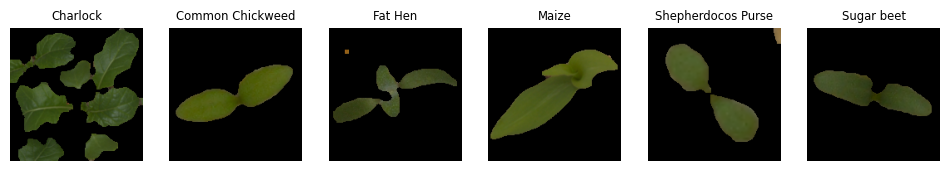

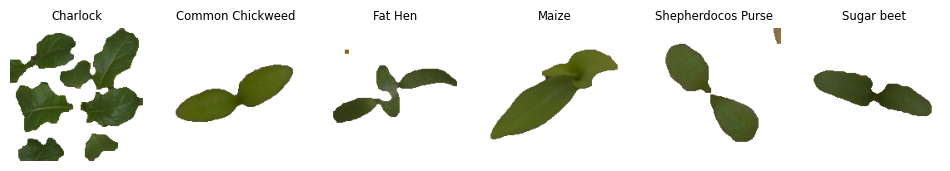

In [32]:
# seuils de valeurs RGB de l'arrère plan(background) extrait de l'histogramme de couleurs du canal 1
threshold   = [-100, -25]
# seuils maximals du noir sur une échelle de [0, 255] pour les 3 canaux
upper_color = [30, 30, 30]
# seuils minimals du noir sur une échelle de [0, 255] pour les 3 canaux
lower_color = [0, 0, 0]
# rayon utilisé pour la dilatation et l'érosion
radius      = 3
# méthode de segmentation  
method      = "numpy"
# idices des différentes espèces 
id_sel      = [1, 3, 5, 7, 9, 11] 

for bg in [ "black", "white"]:
    SemanticImage(
        data        = data,
        index       = index,
        channel     = channel,
        threshold   = threshold,
        upper_color = upper_color,
        lower_color = lower_color,
        legend      = legend,
        radius      = radius,
        method      = method,
        bg          = bg,
        id_sel      = id_sel, 
        deep_mask   = True,
        kernel      = (5, 5)   
    )

```markdown
La plupart des plantes présentes dans ce dataset sont de couleur verte. Cependant, chaque image possède un arrière-plan (background) qui peut ajouter du bruit à l'image, car l'arrière-plan a généralement une couleur différente de celle de la plante. C'est pourquoi il est important que deux pics apparaissent dans l'histogramme des couleurs pour distinguer la pixelisation de l'image de fond de celle de la plante. Les histogrammes avec deux pics, voire plusieurs pics, sont donc plus intéressants. Ils permettent d'observer clairement la séparation des couleurs.
```

##### *[Comment choisir un bon filtre pour la SIS]()*